# Exploratory Data Analysis

This notebook will focus on Exploratory Data Analysis of a financial data set. It will use classes I have made to:

- Convert data types correctly so that analysis can be performed on then
- Clean by data by dropping unneeded columns and imputing missing values in columns that contain null values
- Analyse data
- Visualize data

## Necessary Imports

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import db_utils
from dataFrameInfo import Data_FrameInfo
from dataFrameTransform import Data_FrameTransform
import dataFrameTransform
import plotter
from data_Transform import DataTransform
import statsmodels
import scipy
import sklearn

## Loading in the dataset

At this point, it is necessary to familarise ourselves with the data at hand to work out what transformations need to be performed and how best to do this

In [2]:
df = pd.read_csv('loan_payments.csv')
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,NaN,7.90,156.46,A,A4,...,0.0,0.0,Jan-2022,156.46,Feb-2022,Jan-2022,0.0,146.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60 months,16.99,248.48,D,D1,...,0.0,0.0,Oct-2021,248.48,Feb-2022,Jan-2022,0.0,135.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,NaN,16.20,273.24,C,C4,...,0.0,0.0,Sep-2021,273.24,NaN,Dec-2021,0.0,134.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36 months,12.99,404.27,B,B4,...,0.0,0.0,Mar-2021,7962.74,NaN,Feb-2021,0.0,122.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36 months,13.98,410.02,C,C1,...,0.0,0.0,Jan-2022,410.02,Feb-2022,Jan-2022,0.0,115.0,1,INDIVIDUAL


In [3]:
print(df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

## Ensuring data is the correct type

It is clear that some data needs to be formatted for better use. For instance, the term of the loan could be better represented as an integer with the title informing the user that it is in months. Therefore the "months" can be stripped from each individual entry leaving an integer.

In [4]:
df.rename(columns={"term": "term(mths)"},inplace=True)
df['term(mths)'] = df['term(mths)'].str.replace("months", " ")
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,NaN,7.90,156.46,A,A4,...,0.0,0.0,Jan-2022,156.46,Feb-2022,Jan-2022,0.0,146.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60,16.99,248.48,D,D1,...,0.0,0.0,Oct-2021,248.48,Feb-2022,Jan-2022,0.0,135.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,NaN,16.20,273.24,C,C4,...,0.0,0.0,Sep-2021,273.24,NaN,Dec-2021,0.0,134.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36,12.99,404.27,B,B4,...,0.0,0.0,Mar-2021,7962.74,NaN,Feb-2021,0.0,122.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36,13.98,410.02,C,C1,...,0.0,0.0,Jan-2022,410.02,Feb-2022,Jan-2022,0.0,115.0,1,INDIVIDUAL


From analysing the data, it is clear that some entrys are "N/A" or are blank. I need to change these to NaN before I can convert the data type of the column. This isn't appropriate for every column so I will choose these carefully. 

I will deal with missing data more substantially later in the project.


In [5]:
cols_to_fill = ['mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']

transform = DataTransform(df)

for col in cols_to_fill:
    transform.fill_blanks(col)

df.head(25)
    

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,NaN,7.90,156.46,A,A4,...,0.00,0.0000,Jan-2022,156.46,Feb-2022,Jan-2022,0.0,146.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60,16.99,248.48,D,D1,...,0.00,0.0000,Oct-2021,248.48,Feb-2022,Jan-2022,0.0,135.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,NaN,16.20,273.24,C,C4,...,0.00,0.0000,Sep-2021,273.24,NaN,Dec-2021,0.0,134.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36,12.99,404.27,B,B4,...,0.00,0.0000,Mar-2021,7962.74,NaN,Feb-2021,0.0,122.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36,13.98,410.02,C,C1,...,0.00,0.0000,Jan-2022,410.02,Feb-2022,Jan-2022,0.0,115.0,1,INDIVIDUAL
5,866711,1080269,8500,8500.0,8500.0,36,10.59,276.64,B,B2,...,0.00,0.0000,Sep-2020,290.67,NaN,Sep-2020,0.0,NaN,1,INDIVIDUAL
6,8977266,10779272,10000,10000.0,10000.0,36,13.67,340.18,B,B5,...,0.00,0.0000,Jan-2022,340.18,Feb-2022,Jan-2022,0.0,110.0,1,INDIVIDUAL
7,588267,755824,7200,7200.0,7075.0,36,10.38,233.62,B,B1,...,0.00,0.0000,Jan-2019,233.62,NaN,Jan-2022,0.0,NaN,1,INDIVIDUAL
8,670466,857138,8000,8000.0,8000.0,36,7.29,248.08,A,A4,...,0.00,0.0000,Aug-2017,7036.43,NaN,Dec-2019,0.0,NaN,1,INDIVIDUAL
9,7725259,9427388,3500,3500.0,3500.0,36,NaN,123.40,C,C4,...,0.00,0.0000,Jul-2021,123.40,NaN,Jan-2022,0.0,96.0,1,INDIVIDUAL


From the dtypes cell above, some of the data types can be recasted. I will make a list of each column and what type it should be so I can apply my methods in a more efficient manner

In [6]:
cat_data = ['id', 'member_id','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','application_type','employment_length']
int_data = []
float_data = ['term(mths)', 'mths_since_last_delinq','mths_since_last_record', 'collections_12_mths_ex_med','mths_since_last_major_derog']
bool_data = ['payment_plan']
date_data = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

for col in cat_data:
    transform.cat_type(col)

for col in int_data:
    transform.num_type(col)

for col in float_data:
    transform.float_type(col)

for col in bool_data:
    transform.bool_type(col)

for col in date_data:
    transform.convert_dates(col)

print(df.dtypes)

id                                   category
member_id                            category
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term(mths)                            float64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                             bool
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

## Dealing with missing data

Some data is missing from the table. In some cases, so much data is missing that it is not worth keeping the column at all. In other cases, it will be sufficient to impute the missing values. Depending on what is most reasonable, I will likely impute with the mean or median.

First however, it is necessary to see where the missing data is actually located. For this, I will use the missingno package to visualize this. By using the bar method and heatmap method, it will enable me to see which columns have missing data and if there is any correlation between this.

### Visualization

First however, it is necessary to see where the missing data is actually located. For this, I will use the missingno package to visualize this. By using the bar method and heatmap method, it will enable me to see which columns have missing data and if there is any correlation between this.

<Axes: >

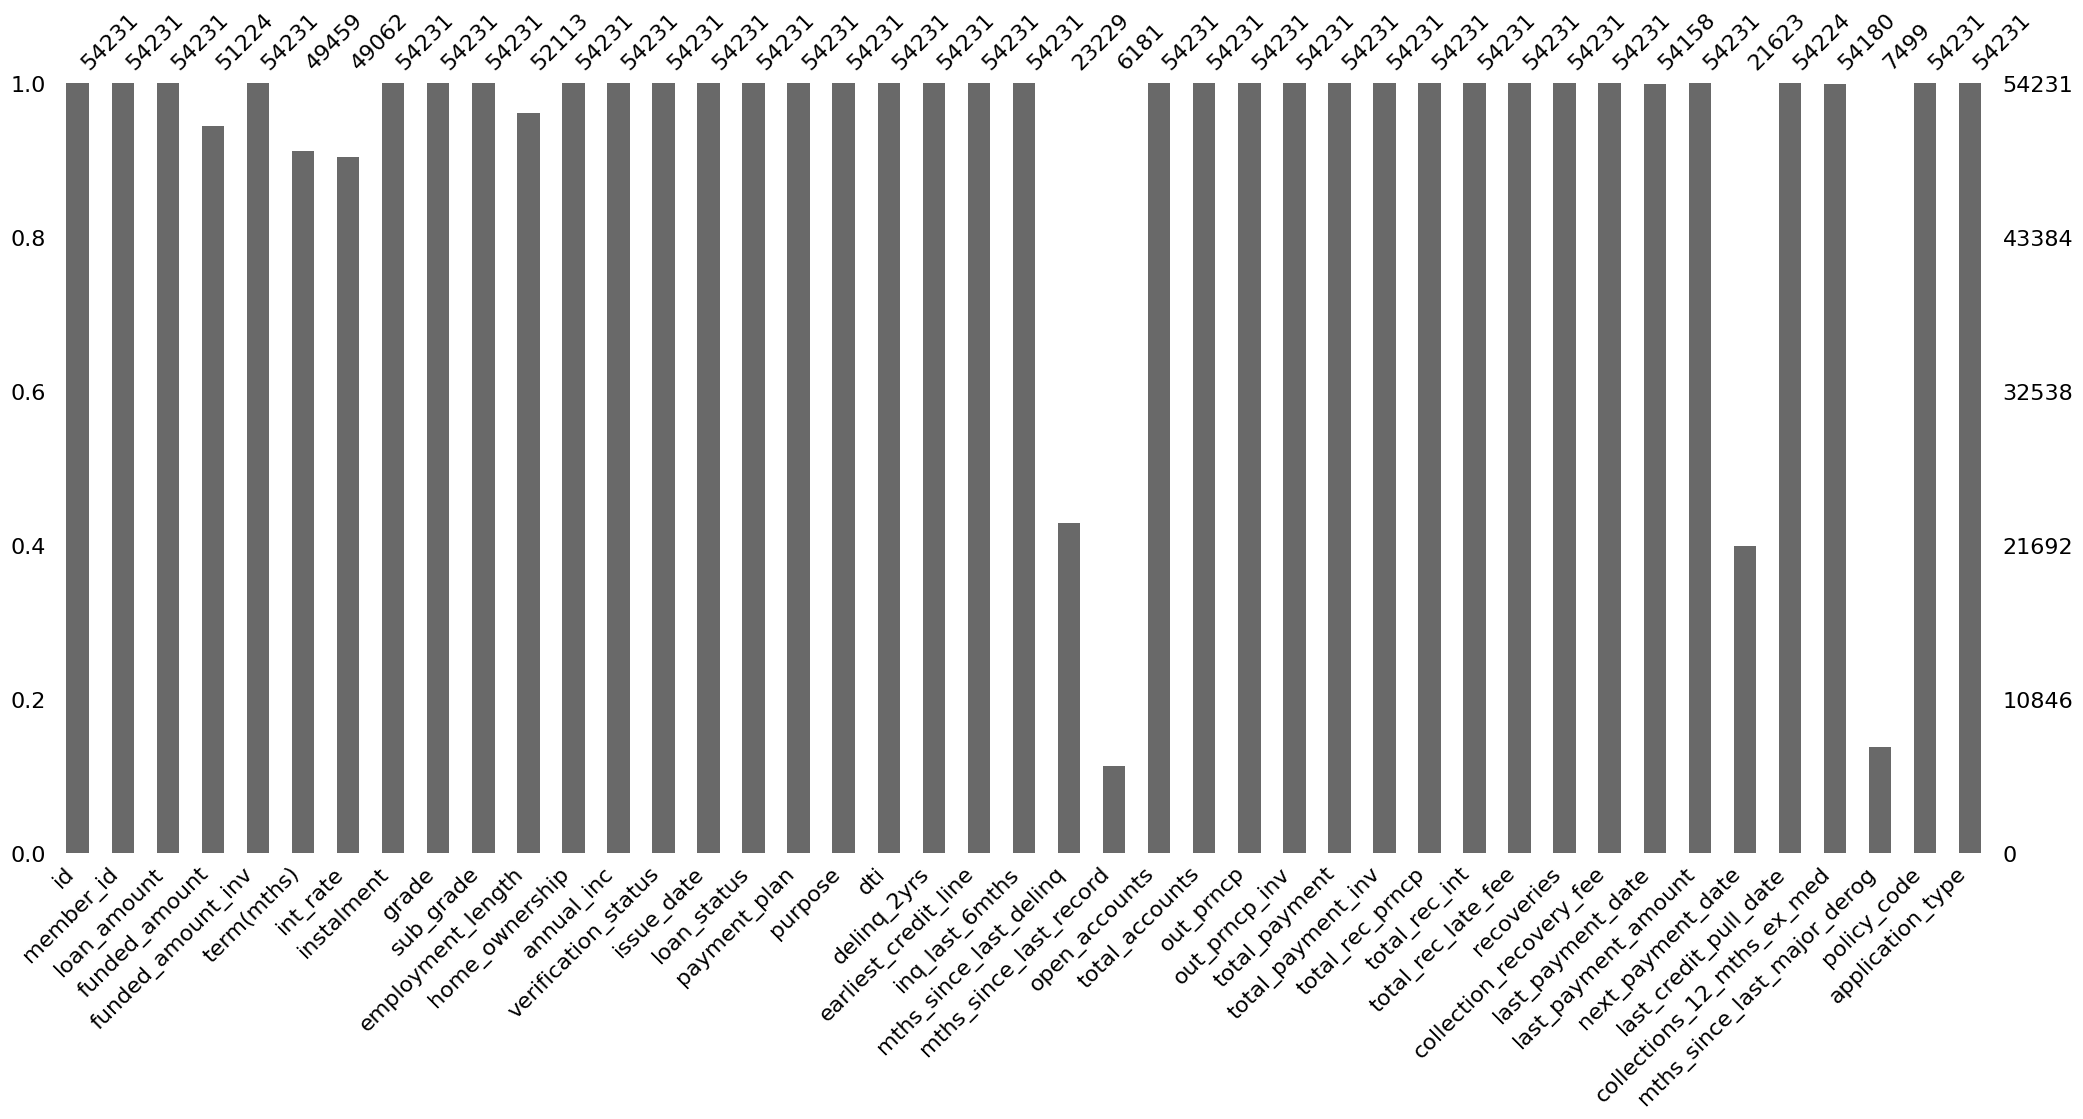

In [7]:
msno.bar(df)

<Axes: >

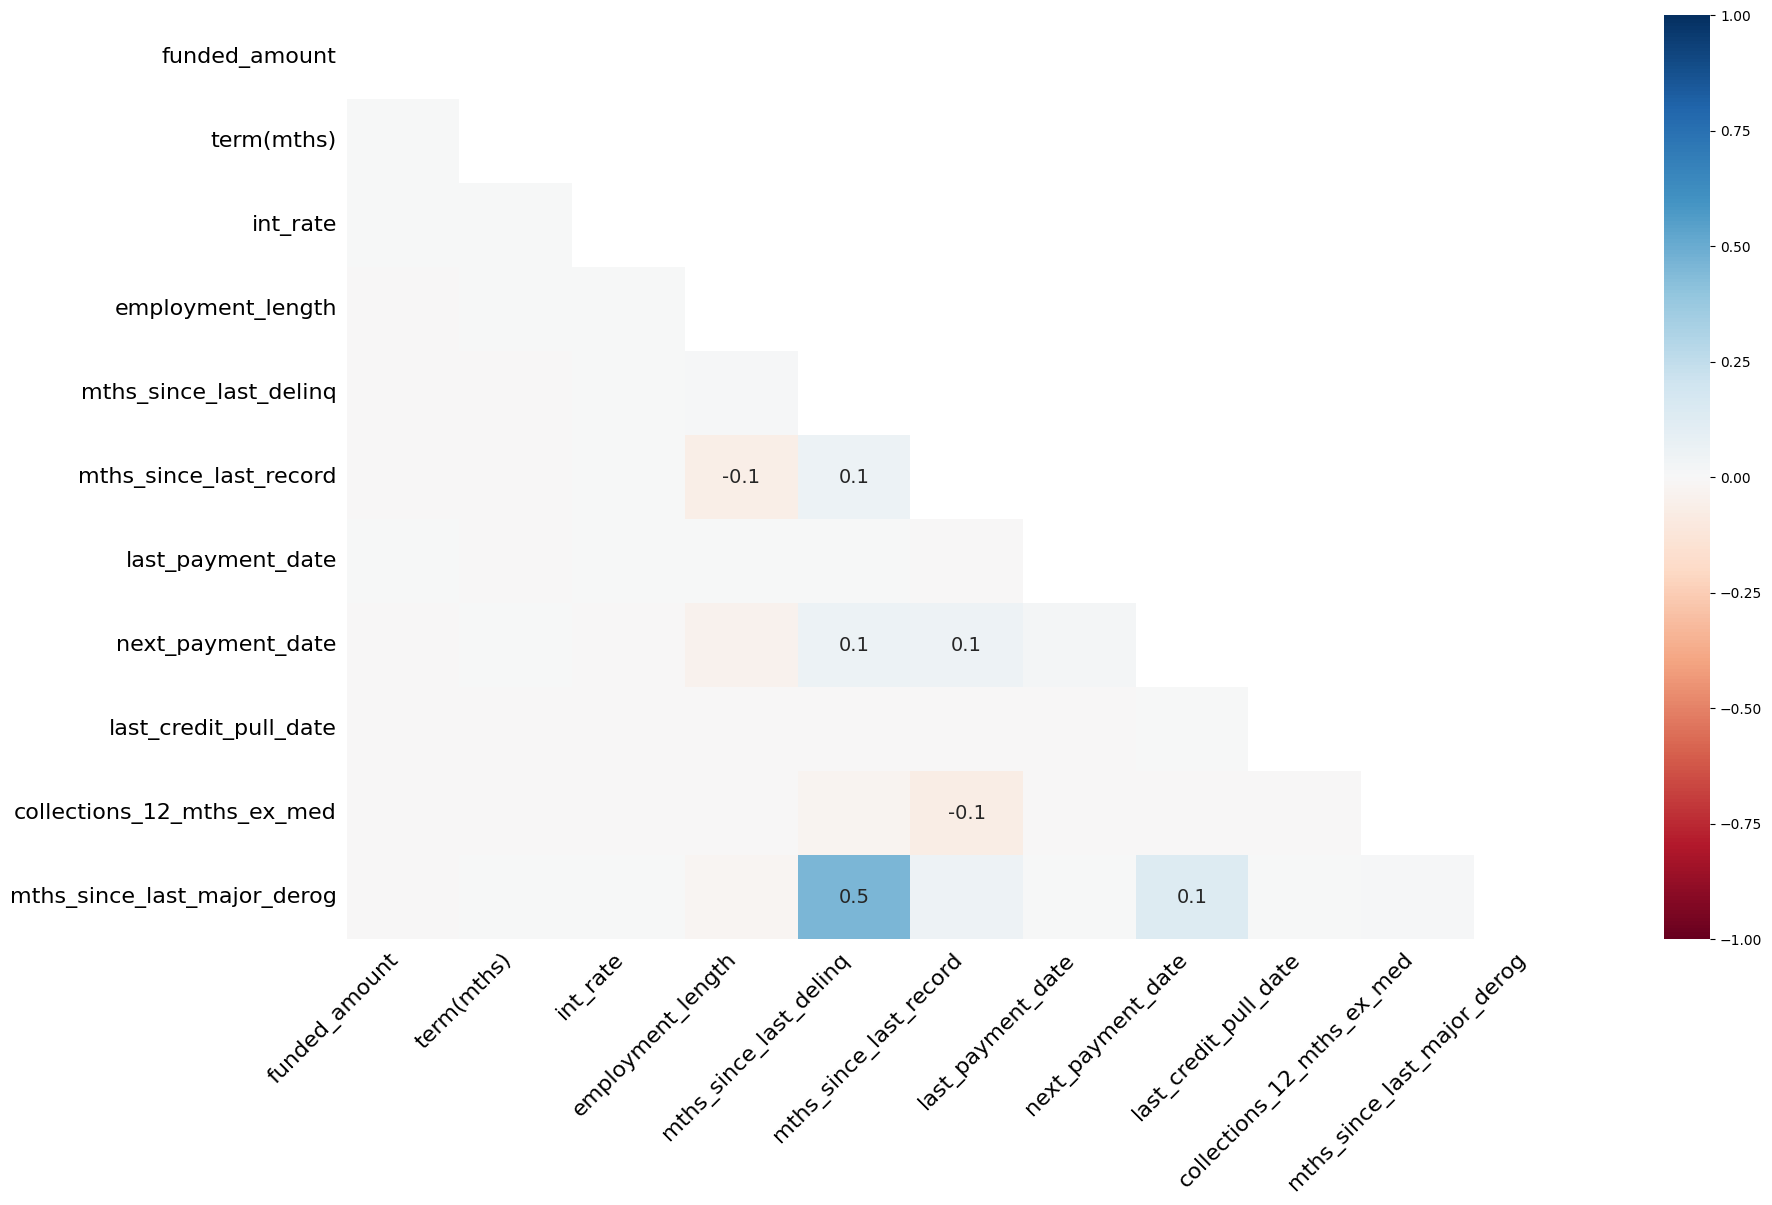

In [8]:
msno.heatmap(df)

As can be seen from the bar model, some columns have only a small amount of missing values and some have a large amount of missing data. These columns need to be dropped. I will use a method to drop those colums of over 50% missing values. The method allows the user to set the percentage to something different for other uses.

In [9]:
dataframetransform = Data_FrameTransform(df)

df = dataframetransform.Nullremoval(50)
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(54231, 39)


<Axes: >

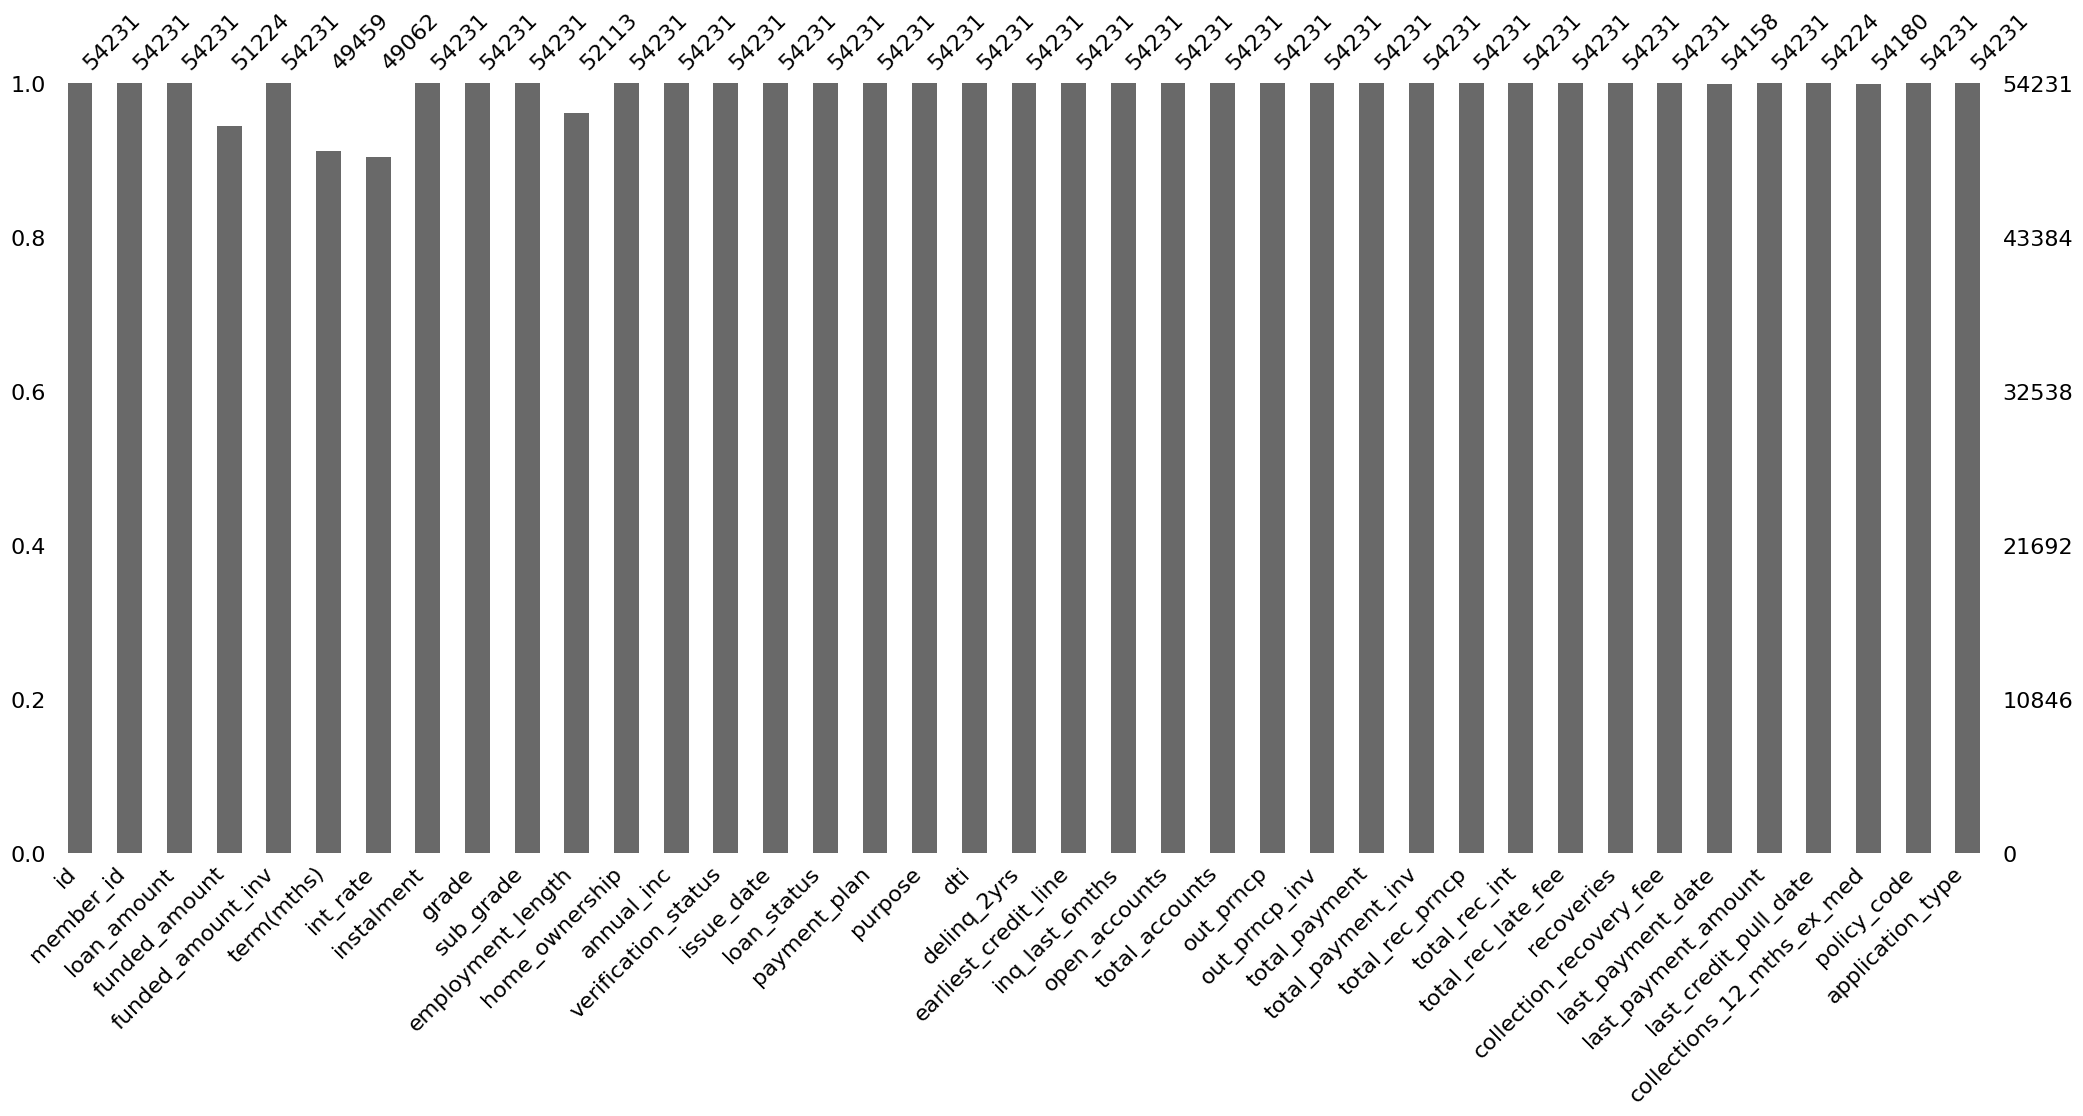

In [10]:
visuals = plotter.Plotter(df)

msno.bar(df)

Revisualising the data now shows a lot less missing information. With the remaining values, more investigation is needed to decide whether to impute the mean or median

In [11]:
dataframeinfo = Data_FrameInfo(df)

dataframeinfo.get_mean('loan_amount')

 #finds the number of unique entries for columns with categorical data
cols_to_count=['application_type','loan_status','verification_status','home_ownership','home_ownership','grade','sub_grade']

for col in cols_to_count:
    dataframeinfo.count_distinct(col)

13333.08
unique application_type values: 1
unique loan_status values: 9
unique verification_status values: 3
unique home_ownership values: 5
unique home_ownership values: 5
unique grade values: 7
unique sub_grade values: 35


<Axes: >

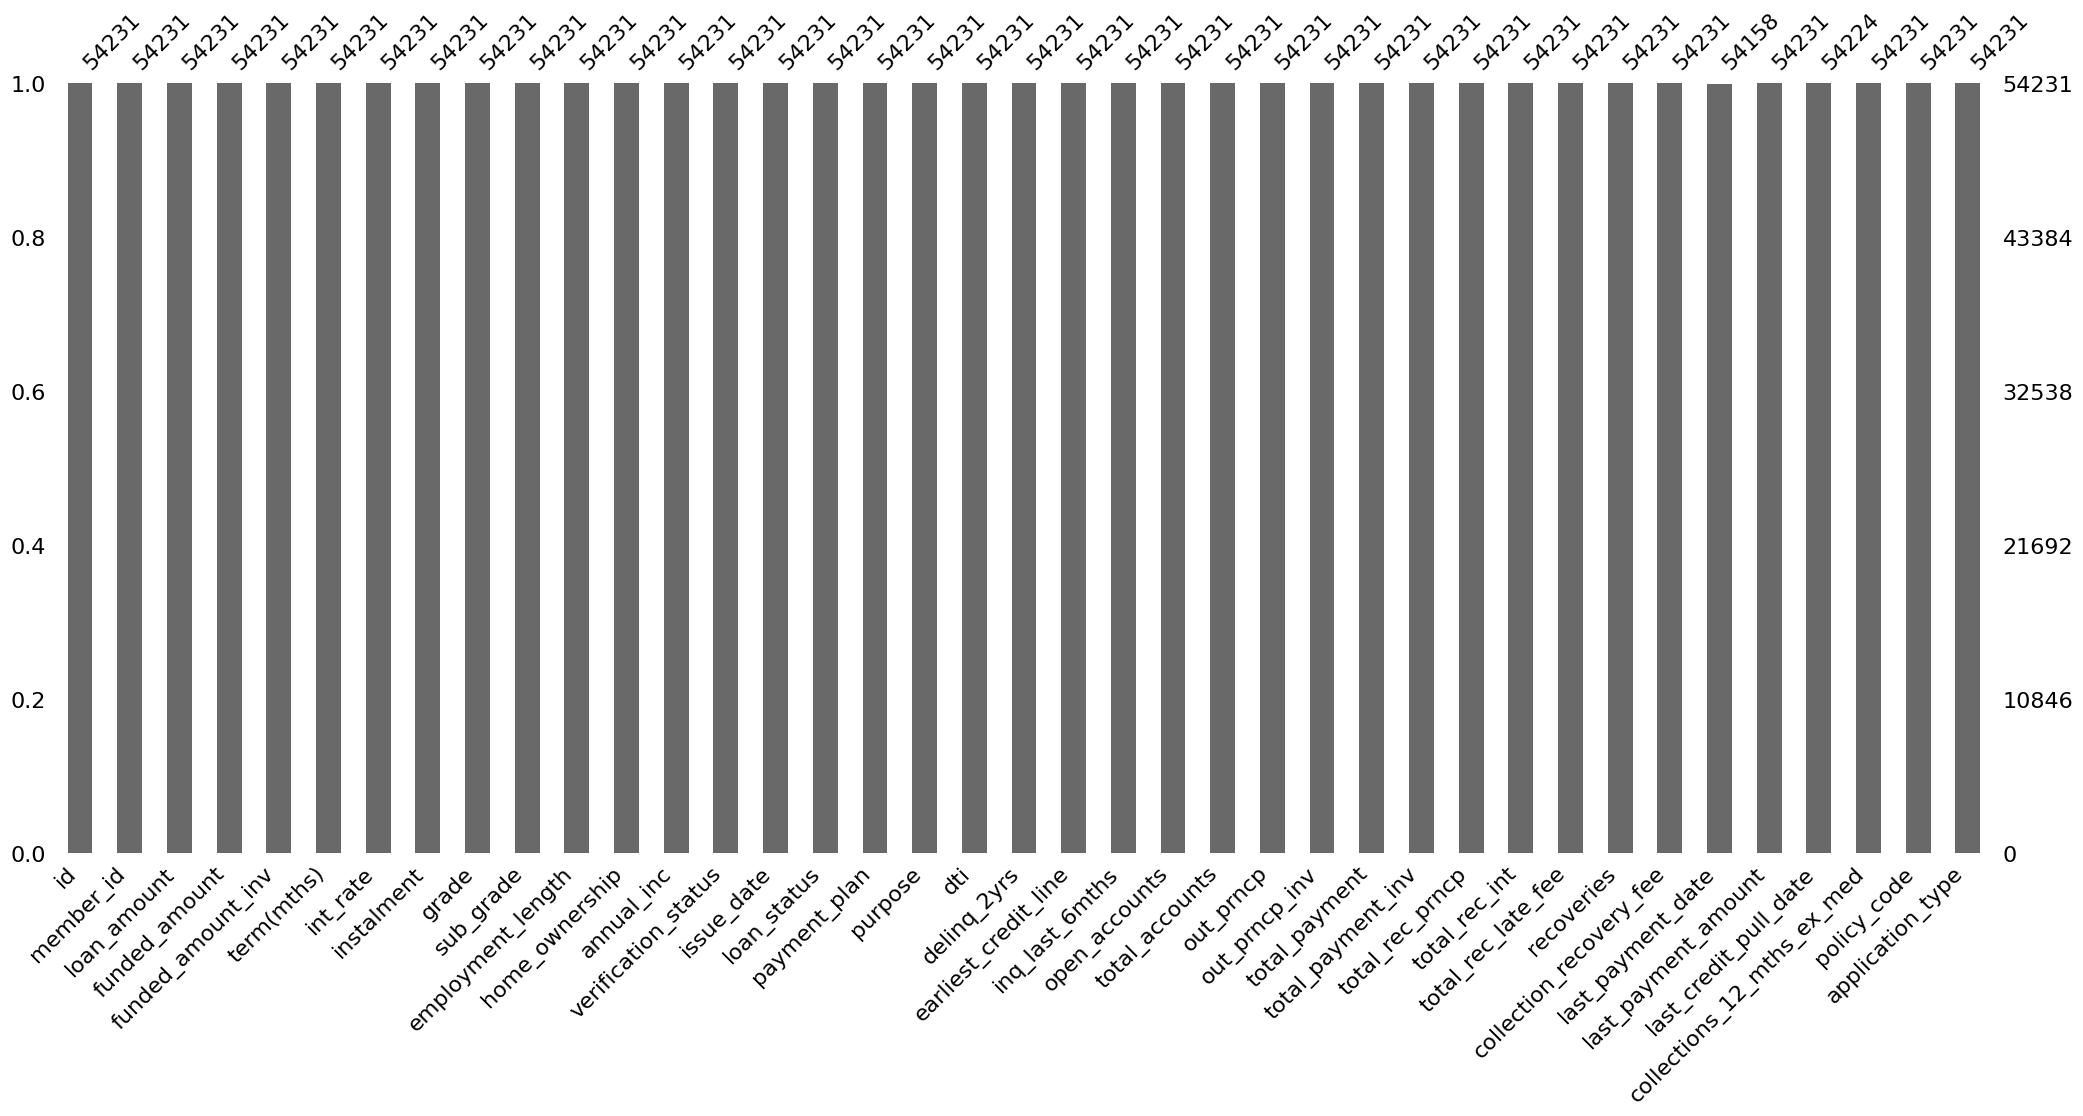

In [12]:
dataframetransform.impute_null_values()

df.head()

msno.bar(df)

This verifies that all null values are now gone from the dataset. It will be useful to save a copy of this data at this point

In [13]:
df.to_csv('dfnonulls.csv')

## Dealing with skewed data

Skewed data needs to be considered and dealt with before analysis of the data can be performed. I need to see how skewed some of the data is and perform an appropriate transform on it.

In [14]:
dataframeinfo.get_skew_info()

Skew of loan_amount is 0.8052592257800115
Skew of funded_amount is 0.8699218016852915
Skew of funded_amount_inv is 0.8139274222318484
Skew of term(mths) is 1.1483578259299068
Skew of int_rate is 0.45651514244548547
Skew of instalment is 0.9969813991920313
Skew of annual_inc is 8.711831033809583
Skew of dti is 0.18941964982496004
Skew of delinq_2yrs is 5.3700018858771355
Skew of inq_last_6mths is 3.248918364007299
Skew of open_accounts is 1.05928200531651
Skew of total_accounts is 0.7790139244121326
Skew of out_prncp is 2.3564261886715125
Skew of out_prncp_inv is 2.356847513100767
Skew of total_payment is 1.2678909577769368
Skew of total_payment_inv is 1.2561966035095133
Skew of total_rec_prncp is 1.2610146774673532
Skew of total_rec_int is 2.204322035306792
Skew of total_rec_late_fee is 13.184304523859353
Skew of recoveries is 14.58979334668037
Skew of collection_recovery_fee is 27.636843108097555
Skew of last_payment_amount is 2.4993811438984825
Skew of collections_12_mths_ex_med is 2

From this data, it appears that the columns with the largest skew are delinq_2yrs, recoveries, collection_recovery_fee, collections_12_mths_ex_med. Although the numbers themselves don't help much. 

I will use a method I created to visualize the skewness for all columns


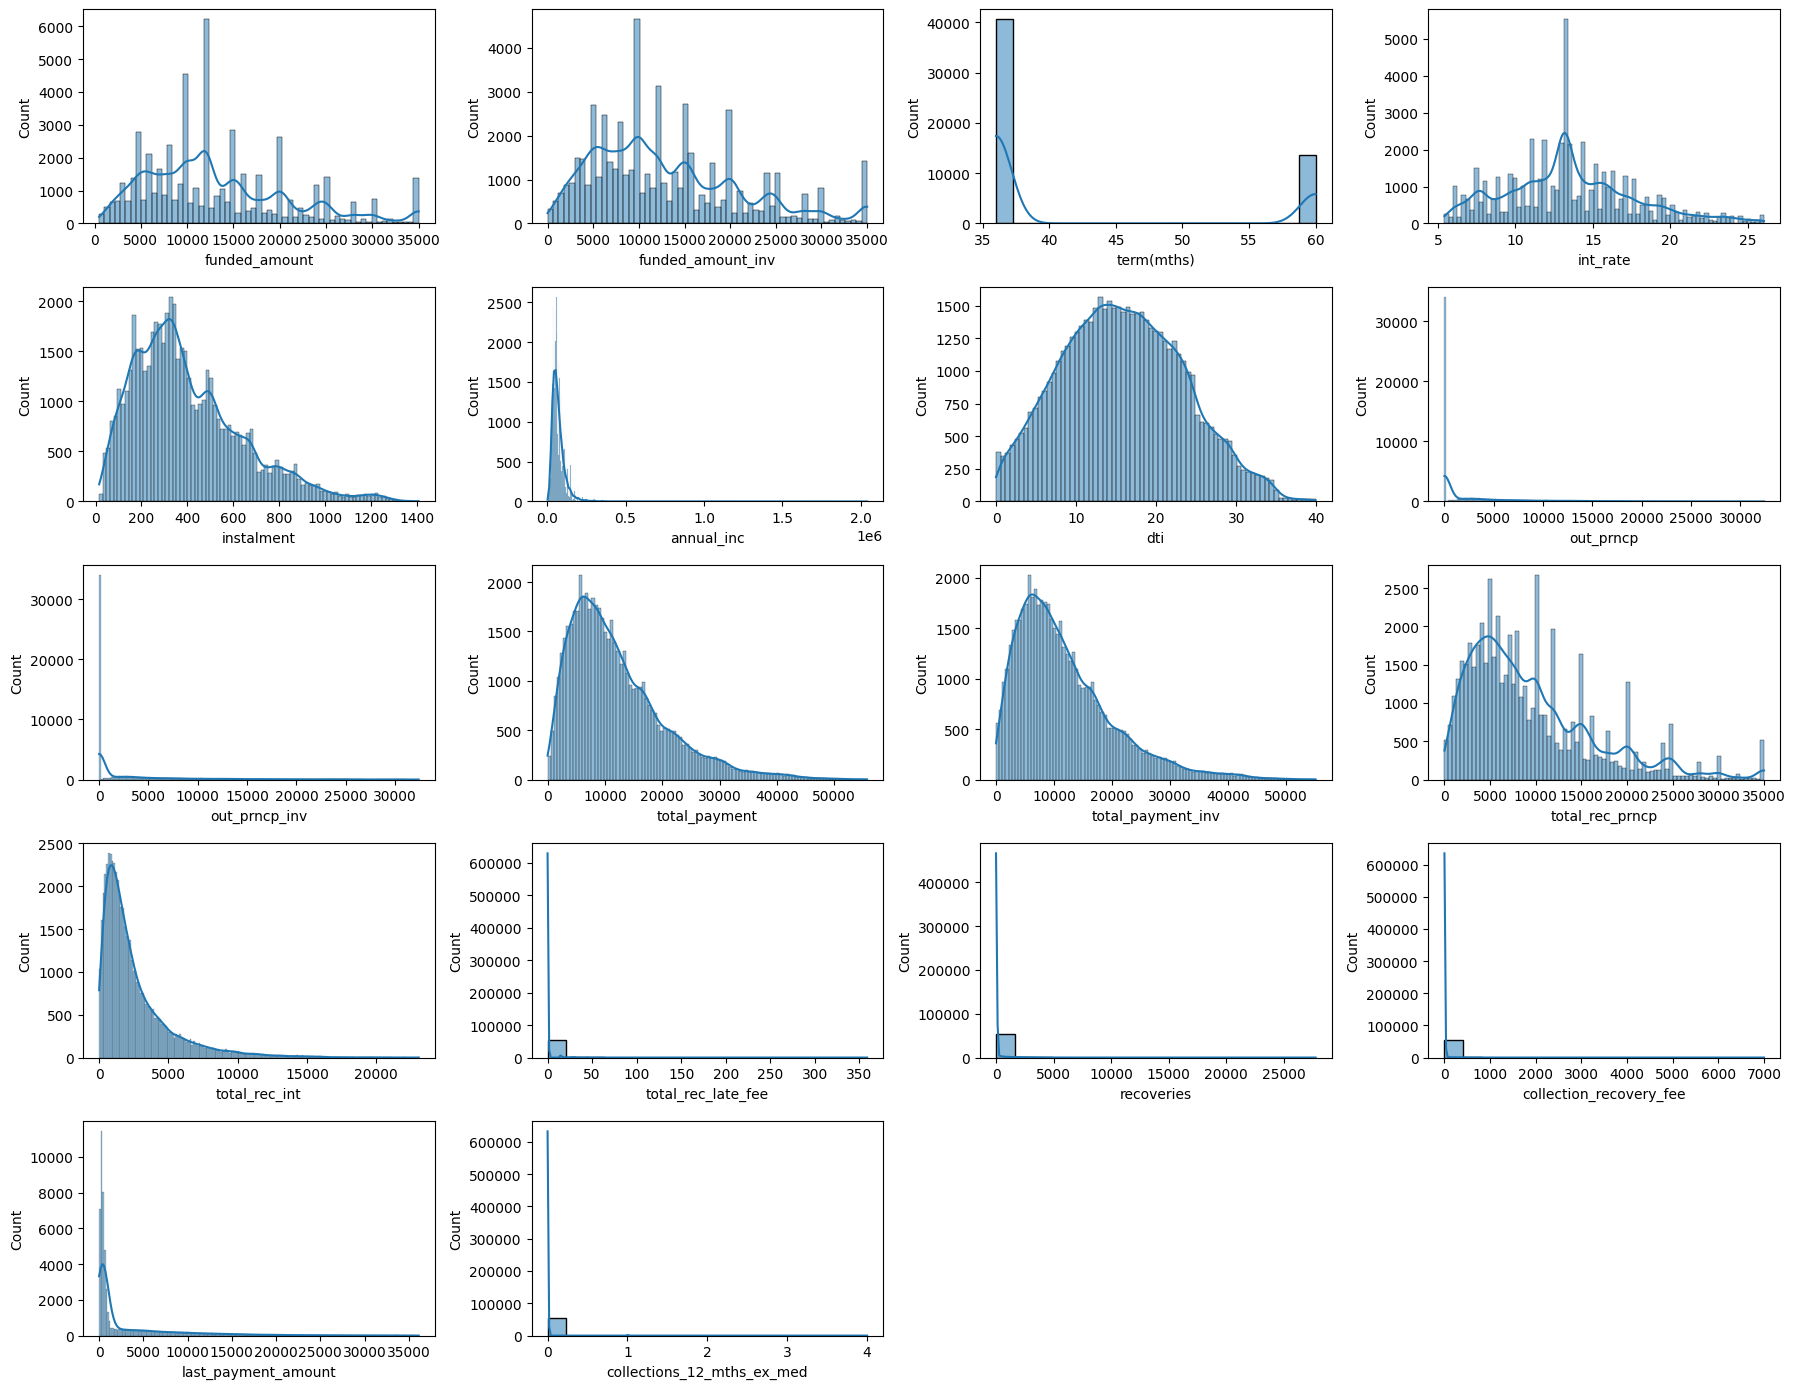

In [15]:
visuals.visualise_skewness()

It appears that a number of the columns have a positive skew and more columns are going to be transformed than initially though. For the graphs below, I will use PowerTransform to perform a Yeo-Johnson transformation to a number of these columns

Skewness of loan_amount after transformation: 0.8052592257800115


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of funded_amount after transformation: 0.8699218016852915


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of funded_amount_inv after transformation: 0.8139274222318484


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of term(mths) after transformation: 1.1483578259299068


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of int_rate after transformation: 0.45651514244548547


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of instalment after transformation: 0.9969813991920313


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of annual_inc before transformation: 8.711831033809583
Skewness of annual_inc after transformation: -0.011948156512834896


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of dti after transformation: 0.18941964982496004


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of delinq_2yrs before transformation: 5.3700018858771355
Skewness of delinq_2yrs after transformation: 1.8694371694101375


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of inq_last_6mths before transformation: 3.248918364007299
Skewness of inq_last_6mths after transformation: 0.25099902330294144


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of open_accounts after transformation: 1.05928200531651


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of total_accounts after transformation: 0.7790139244121326


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of out_prncp before transformation: 2.3564261886715125
Skewness of out_prncp after transformation: 0.5328788124729378


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of out_prncp_inv before transformation: 2.356847513100767
Skewness of out_prncp_inv after transformation: 0.5328964985875018


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of total_payment after transformation: 1.2678909577769368


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of total_payment_inv after transformation: 1.2561966035095133


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of total_rec_prncp after transformation: 1.2610146774673532


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,391.12,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,4262.24,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,705.81,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of total_rec_int before transformation: 2.204322035306792
Skewness of total_rec_int after transformation: 0.0208370710701108


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,0.0,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,0.0,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,0.0,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,0.0,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,0.0,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,0.0,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,0.0,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,0.0,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of total_rec_late_fee before transformation: 13.184304523859353
Skewness of total_rec_late_fee after transformation: 5.279001956131547


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,-0.183125,0.00,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,-0.183125,0.00,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,-0.183125,0.00,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,-0.183125,0.00,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,-0.183125,0.00,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,-0.183125,0.00,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,-0.183125,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,-0.183125,0.00,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,-0.183125,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of recoveries before transformation: 14.58979334668037
Skewness of recoveries after transformation: 3.44626908511126


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,-0.183125,-0.269167,0.00,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,-0.183125,-0.269167,0.00,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,-0.183125,-0.269167,0.00,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,-0.183125,-0.269167,0.00,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,-0.183125,-0.269167,0.00,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,-0.183125,-0.269167,0.00,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,-0.183125,-0.269167,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,-0.183125,-0.269167,0.00,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,-0.183125,-0.269167,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of collection_recovery_fee before transformation: 27.636843108097555
Skewness of collection_recovery_fee after transformation: 3.588305841158178


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,-0.183125,-0.269167,-0.260139,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,-0.183125,-0.269167,-0.260139,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,-0.183125,-0.269167,-0.260139,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,-0.183125,-0.269167,-0.260139,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,-0.183125,-0.269167,-0.260139,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,-0.183125,-0.269167,-0.260139,2016-09-01,89.80,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,-0.183125,-0.269167,-0.260139,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,-0.183125,-0.269167,-0.260139,2016-09-01,135.51,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,-0.183125,-0.269167,-0.260139,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL


Skewness of last_payment_amount before transformation: 2.4993811438984825
Skewness of last_payment_amount after transformation: -0.0017660689044676028


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,-0.183125,-0.269167,-0.260139,2022-01-01,-1.016802,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,-0.183125,-0.269167,-0.260139,2021-10-01,-0.732317,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,-0.183125,-0.269167,-0.260139,2021-09-01,-0.674189,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,-0.183125,-0.269167,-0.260139,2021-03-01,1.316167,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,-0.183125,-0.269167,-0.260139,2022-01-01,-0.427019,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,-0.183125,-0.269167,-0.260139,2016-09-01,-1.361024,2013-08-01,0.0,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,-0.183125,-0.269167,-0.260139,2016-02-01,-0.123446,2022-01-01,0.0,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,-0.183125,-0.269167,-0.260139,2016-09-01,-1.105664,2016-09-01,0.0,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,-0.183125,-0.269167,-0.260139,2016-09-01,-1.231663,2013-05-01,0.0,1,INDIVIDUAL


Skewness of collections_12_mths_ex_med before transformation: 20.262376234997777
Skewness of collections_12_mths_ex_med after transformation: 16.015508943386244


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,-0.183125,-0.269167,-0.260139,2022-01-01,-1.016802,2022-01-01,-0.0622,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,-0.183125,-0.269167,-0.260139,2021-10-01,-0.732317,2022-01-01,-0.0622,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,-0.183125,-0.269167,-0.260139,2021-09-01,-0.674189,2021-12-01,-0.0622,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,-0.183125,-0.269167,-0.260139,2021-03-01,1.316167,2021-02-01,-0.0622,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,-0.183125,-0.269167,-0.260139,2022-01-01,-0.427019,2022-01-01,-0.0622,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,-0.183125,-0.269167,-0.260139,2016-09-01,-1.361024,2013-08-01,-0.0622,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,-0.183125,-0.269167,-0.260139,2016-02-01,-0.123446,2022-01-01,-0.0622,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,-0.183125,-0.269167,-0.260139,2016-09-01,-1.105664,2016-09-01,-0.0622,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,-0.183125,-0.269167,-0.260139,2016-09-01,-1.231663,2013-05-01,-0.0622,1,INDIVIDUAL


Skewness of policy_code after transformation: 0.0


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,-1.017486,-0.183125,-0.269167,-0.260139,2022-01-01,-1.016802,2022-01-01,-0.0622,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,0.344468,-0.183125,-0.269167,-0.260139,2021-10-01,-0.732317,2022-01-01,-0.0622,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,-0.048725,-0.183125,-0.269167,-0.260139,2021-09-01,-0.674189,2021-12-01,-0.0622,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,-0.101066,-0.183125,-0.269167,-0.260139,2021-03-01,1.316167,2021-02-01,-0.0622,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,0.323864,-0.183125,-0.269167,-0.260139,2022-01-01,-0.427019,2022-01-01,-0.0622,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,121535,121373,2800,2800.0,1625.0,36.0,8.70,88.65,B,B1,...,-1.317665,-0.183125,-0.269167,-0.260139,2016-09-01,-1.361024,2013-08-01,-0.0622,1,INDIVIDUAL
54227,111227,111223,20000,20000.0,2800.0,36.0,13.43,678.08,E,E1,...,0.938028,-0.183125,-0.269167,-0.260139,2016-02-01,-0.123446,2022-01-01,-0.0622,1,INDIVIDUAL
54228,111564,102675,4100,4100.0,2775.0,36.0,10.59,133.44,C,C2,...,-0.852670,-0.183125,-0.269167,-0.260139,2016-09-01,-1.105664,2016-09-01,-0.0622,1,INDIVIDUAL
54229,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,-1.272674,-0.183125,-0.269167,-0.260139,2016-09-01,-1.231663,2013-05-01,-0.0622,1,INDIVIDUAL


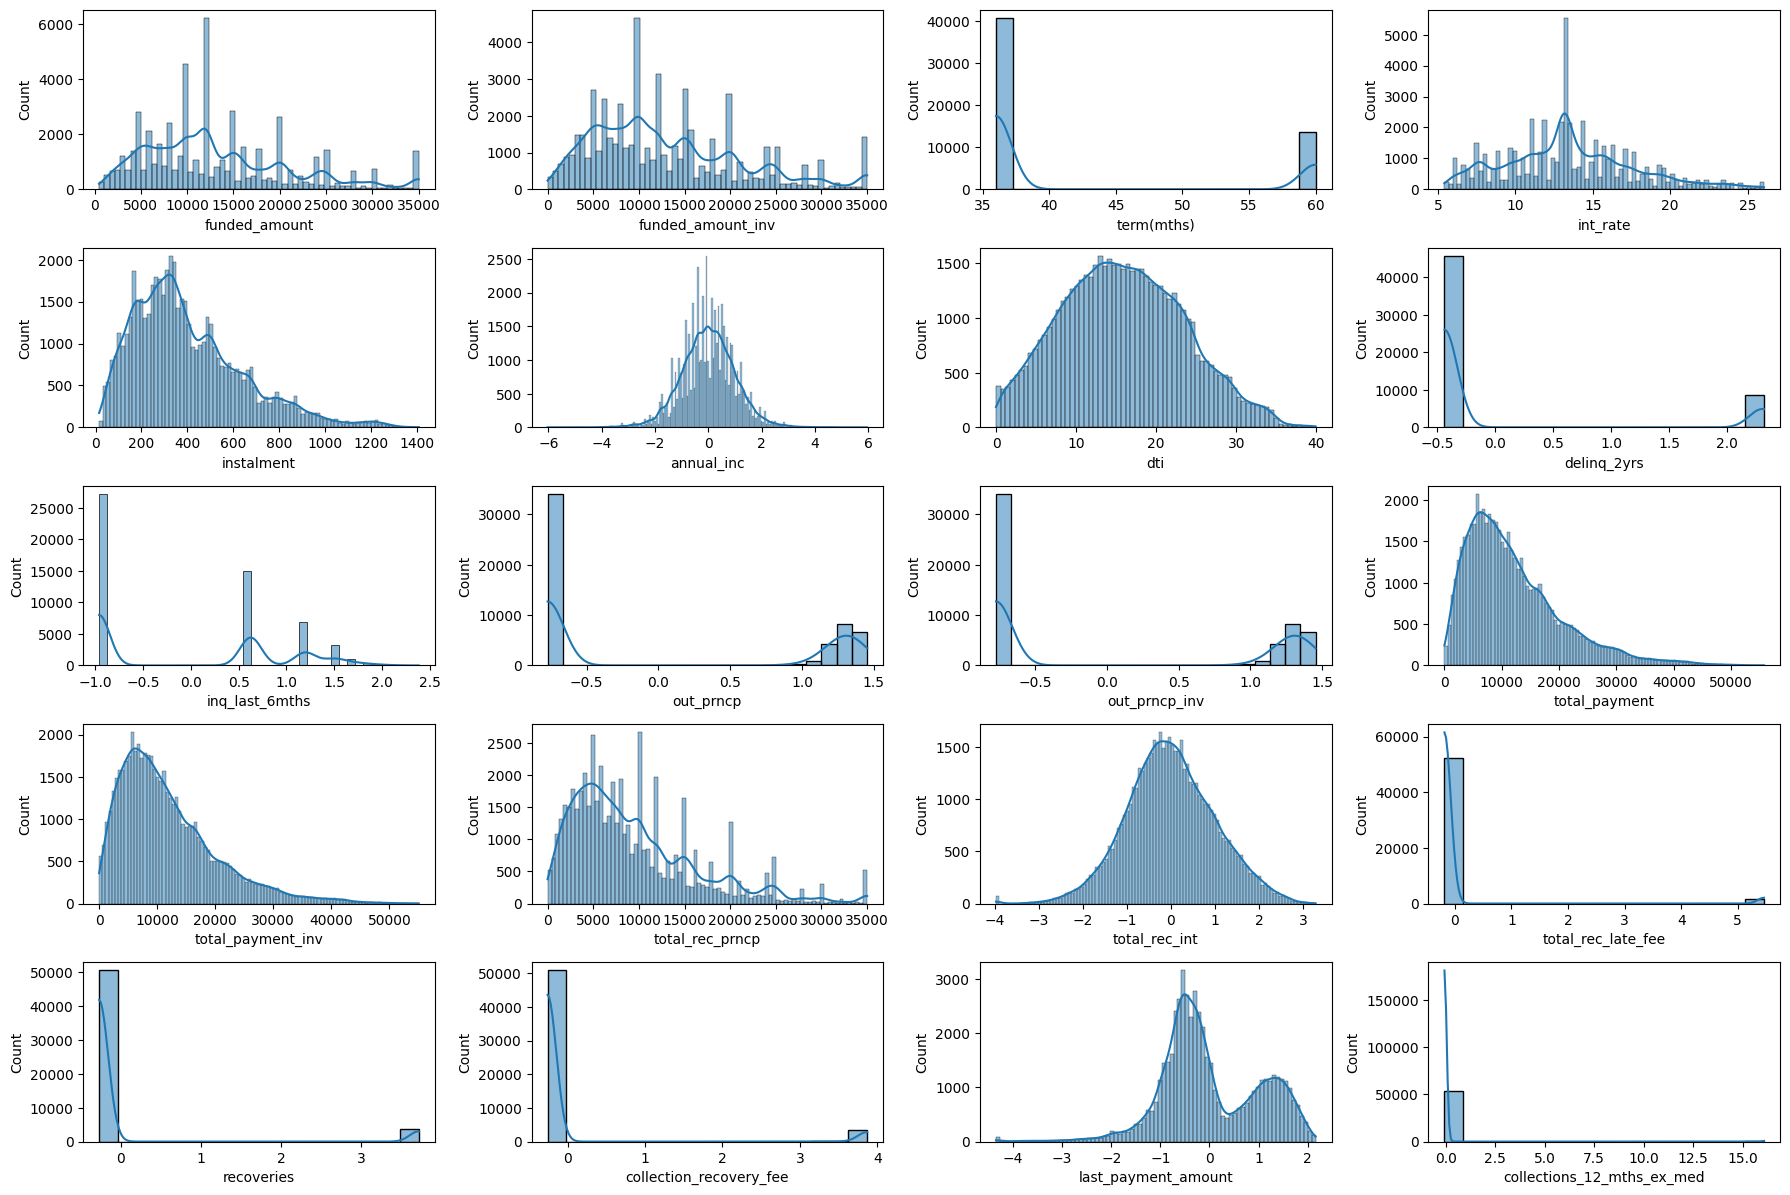

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,8588502,10330306,5000,5000.0,5000.0,36.0,7.90,156.46,A,A4,...,576.93,0.0,0.0,0.0,2022-01-01,156.46,2022-01-01,0.0,1,INDIVIDUAL
1,9787624,11639501,10000,10000.0,9975.0,60.0,16.99,248.48,D,D1,...,2508.62,0.0,0.0,0.0,2021-10-01,248.48,2022-01-01,0.0,1,INDIVIDUAL
2,8126774,9868806,7750,7750.0,7750.0,36.0,16.20,273.24,C,C4,...,1709.72,0.0,0.0,0.0,2021-09-01,273.24,2021-12-01,0.0,1,INDIVIDUAL
3,8959002,10750928,12000,12000.0,11975.0,36.0,12.99,404.27,B,B4,...,1621.08,0.0,0.0,0.0,2021-03-01,7962.74,2021-02-01,0.0,1,INDIVIDUAL
4,8148555,4640566,12000,12000.0,12000.0,36.0,13.98,410.02,C,C1,...,2460.41,0.0,0.0,0.0,2022-01-01,410.02,2022-01-01,0.0,1,INDIVIDUAL


In [17]:
#in order to keep the intergrity of my data it is necessary to create a copy of the dataframe before applying skew transforms

df_to_unskew = df.copy()

skewtransforms = Data_FrameTransform(df_to_unskew)

for col in df_to_unskew:
    if df_to_unskew[col].dtype == 'float64' or df_to_unskew[col].dtype == 'Int64' or df_to_unskew[col].dtype == 'int64' or df_to_unskew[col].dtype==  'object':
        nonskewed_df = skewtransforms.transform_column(col)

noskew_visuals = plotter.Plotter(nonskewed_df)
noskew_visuals.visualise_skewness()
df.head()

The shape of the distributions now indicates that the skew has been corrected.

In [18]:
nonskewed_df.to_csv('dfnoskew.csv')

## Dealing with Outliers

In the next stage, I will visualise my data in the form of box plots to demonstrate outliers in the dataset. 

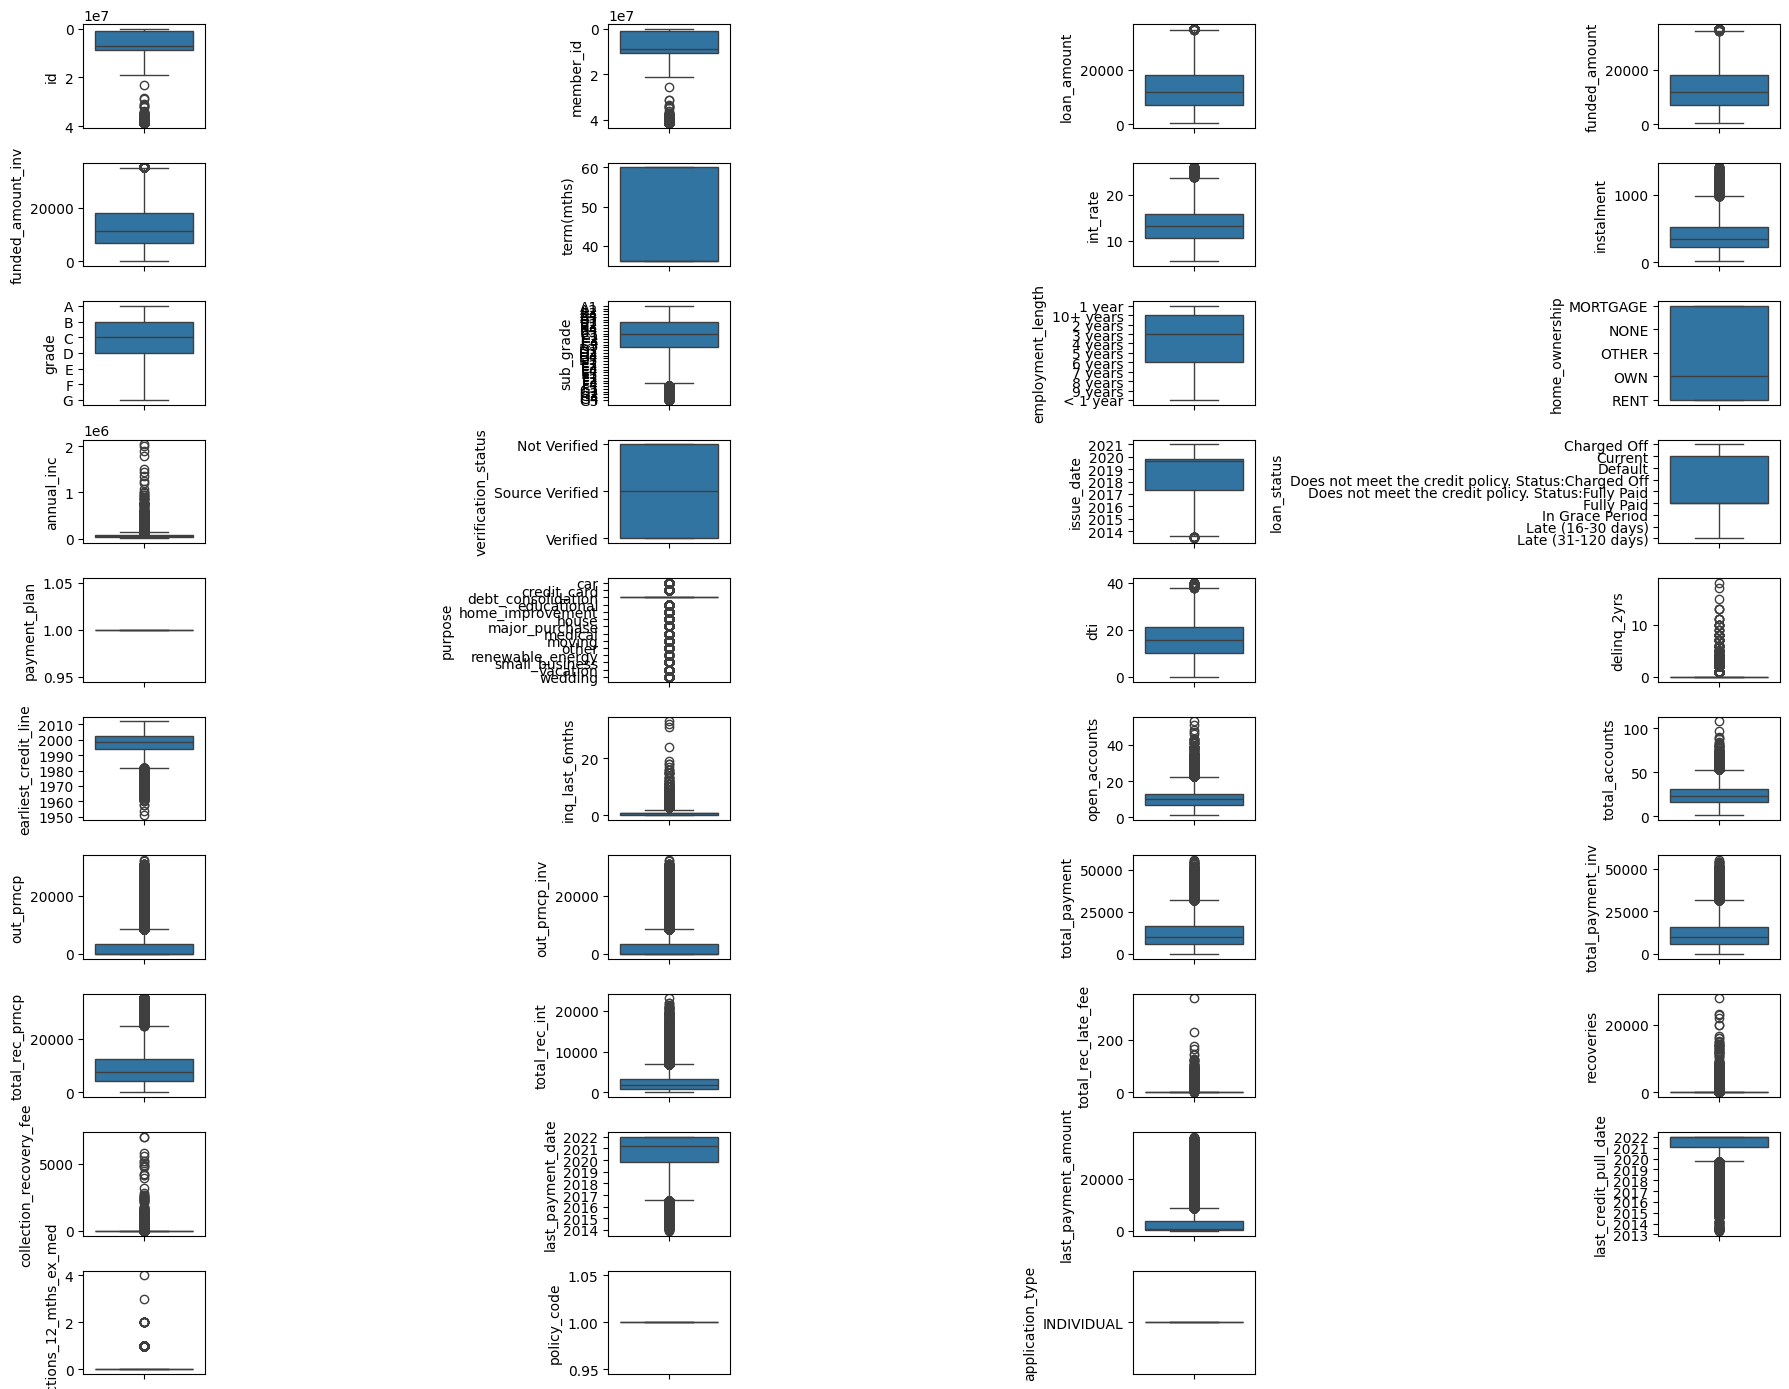

In [19]:
visuals.visualise_outliers()

Aa can be seen, several columns have outliers. These need to be corrected. I will remove any outliers that are outside of 1.5x the upper and lower quartiles of each set of data.

In [21]:
outlier_trans = Data_FrameTransform(df)

outliers_removed_df_IQR = outlier_trans.treat_outliers_IQR()

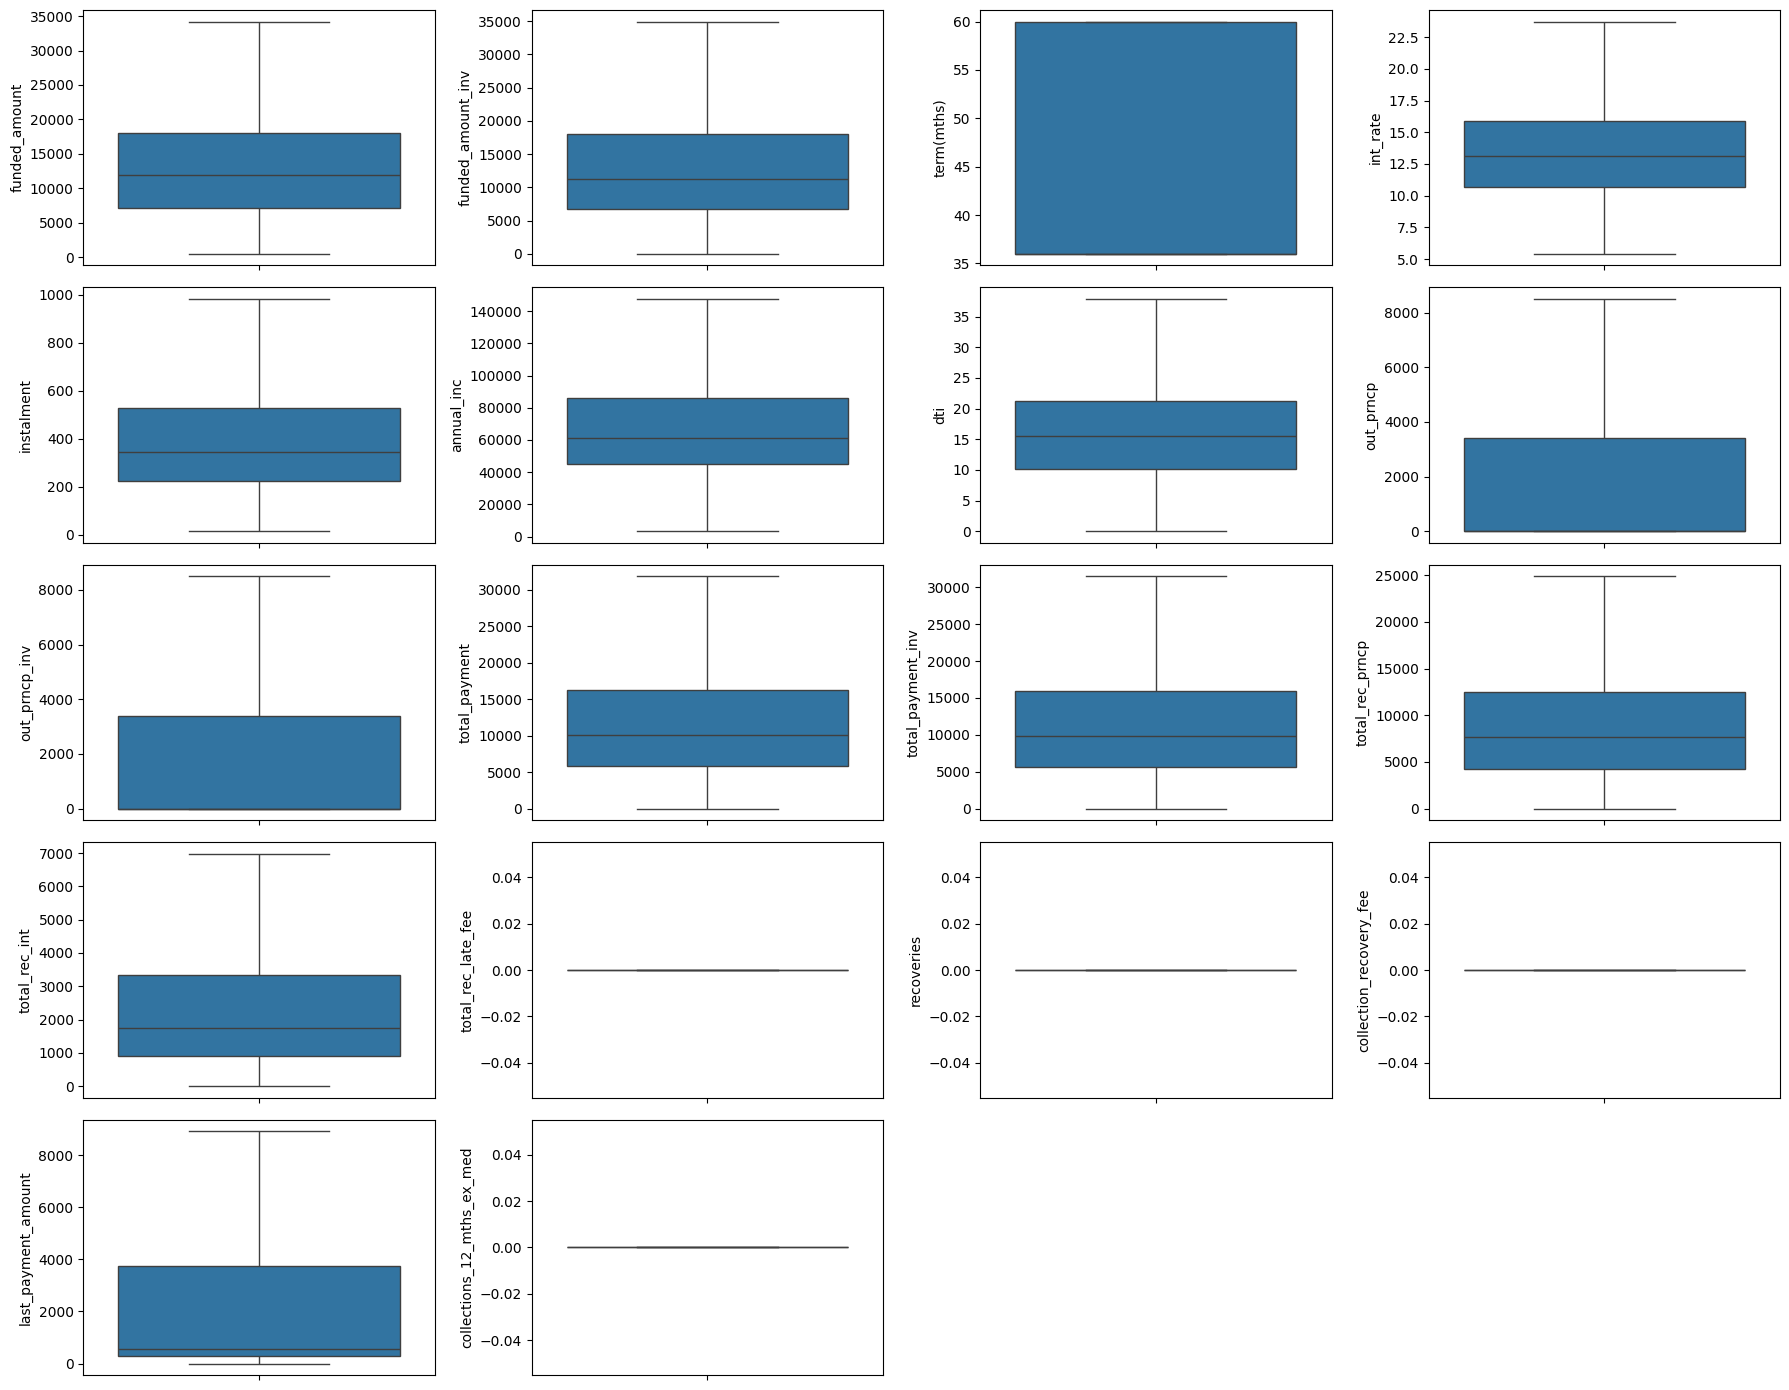

In [22]:
#new instantiation required for new dataframe
no_outlier_visuals_IQR = plotter.Plotter(outliers_removed_df_IQR)

no_outlier_visuals_IQR.visualise_outliers()

outliers_removed_df_IQR.to_csv('dfnooutliersIQR.csv')

This method has been successful in capping outliers but it is clear that for some columns it has effectively removed all of the data. This will not do. I need to go back and try a different method in order to treat these columns more effectively. I will calculate the z-scores for the data for each column and see what to do from here

In [23]:
#selects numerical columns to check z-scores for
data_to_check = df.select_dtypes('float64')

#creates a dataframe of z-scores using a method I created
df_to_zscore = Data_FrameInfo(data_to_check)
z_scoresdf = df_to_zscore.z_scores()

#selects rows from this dataframe that have any z-score with an absolute value of greater than 3.5
rows_to_drop = z_scoresdf[z_scoresdf.apply(lambda row: row.ge(abs(3.5)).any(), axis=1)]

#drops these rows and returns what remains
df1 = df.drop(rows_to_drop.index) # () looks for row number, [] looks for a key

print(df1)

            id member_id  loan_amount  funded_amount  funded_amount_inv  \
0      8588502  10330306         5000         5000.0             5000.0   
1      9787624  11639501        10000        10000.0             9975.0   
2      8126774   9868806         7750         7750.0             7750.0   
3      8959002  10750928        12000        12000.0            11975.0   
4      8148555   4640566        12000        12000.0            12000.0   
...        ...       ...          ...            ...                ...   
54225   124624    124621         4000         4000.0             2675.0   
54226   121535    121373         2800         2800.0             1625.0   
54227   111227    111223        20000        20000.0             2800.0   
54228   111564    102675         4100         4100.0             2775.0   
54230    72323     70694         5000         5000.0              350.0   

       term(mths)  int_rate  instalment grade sub_grade  ... total_rec_int  \
0            36.0    

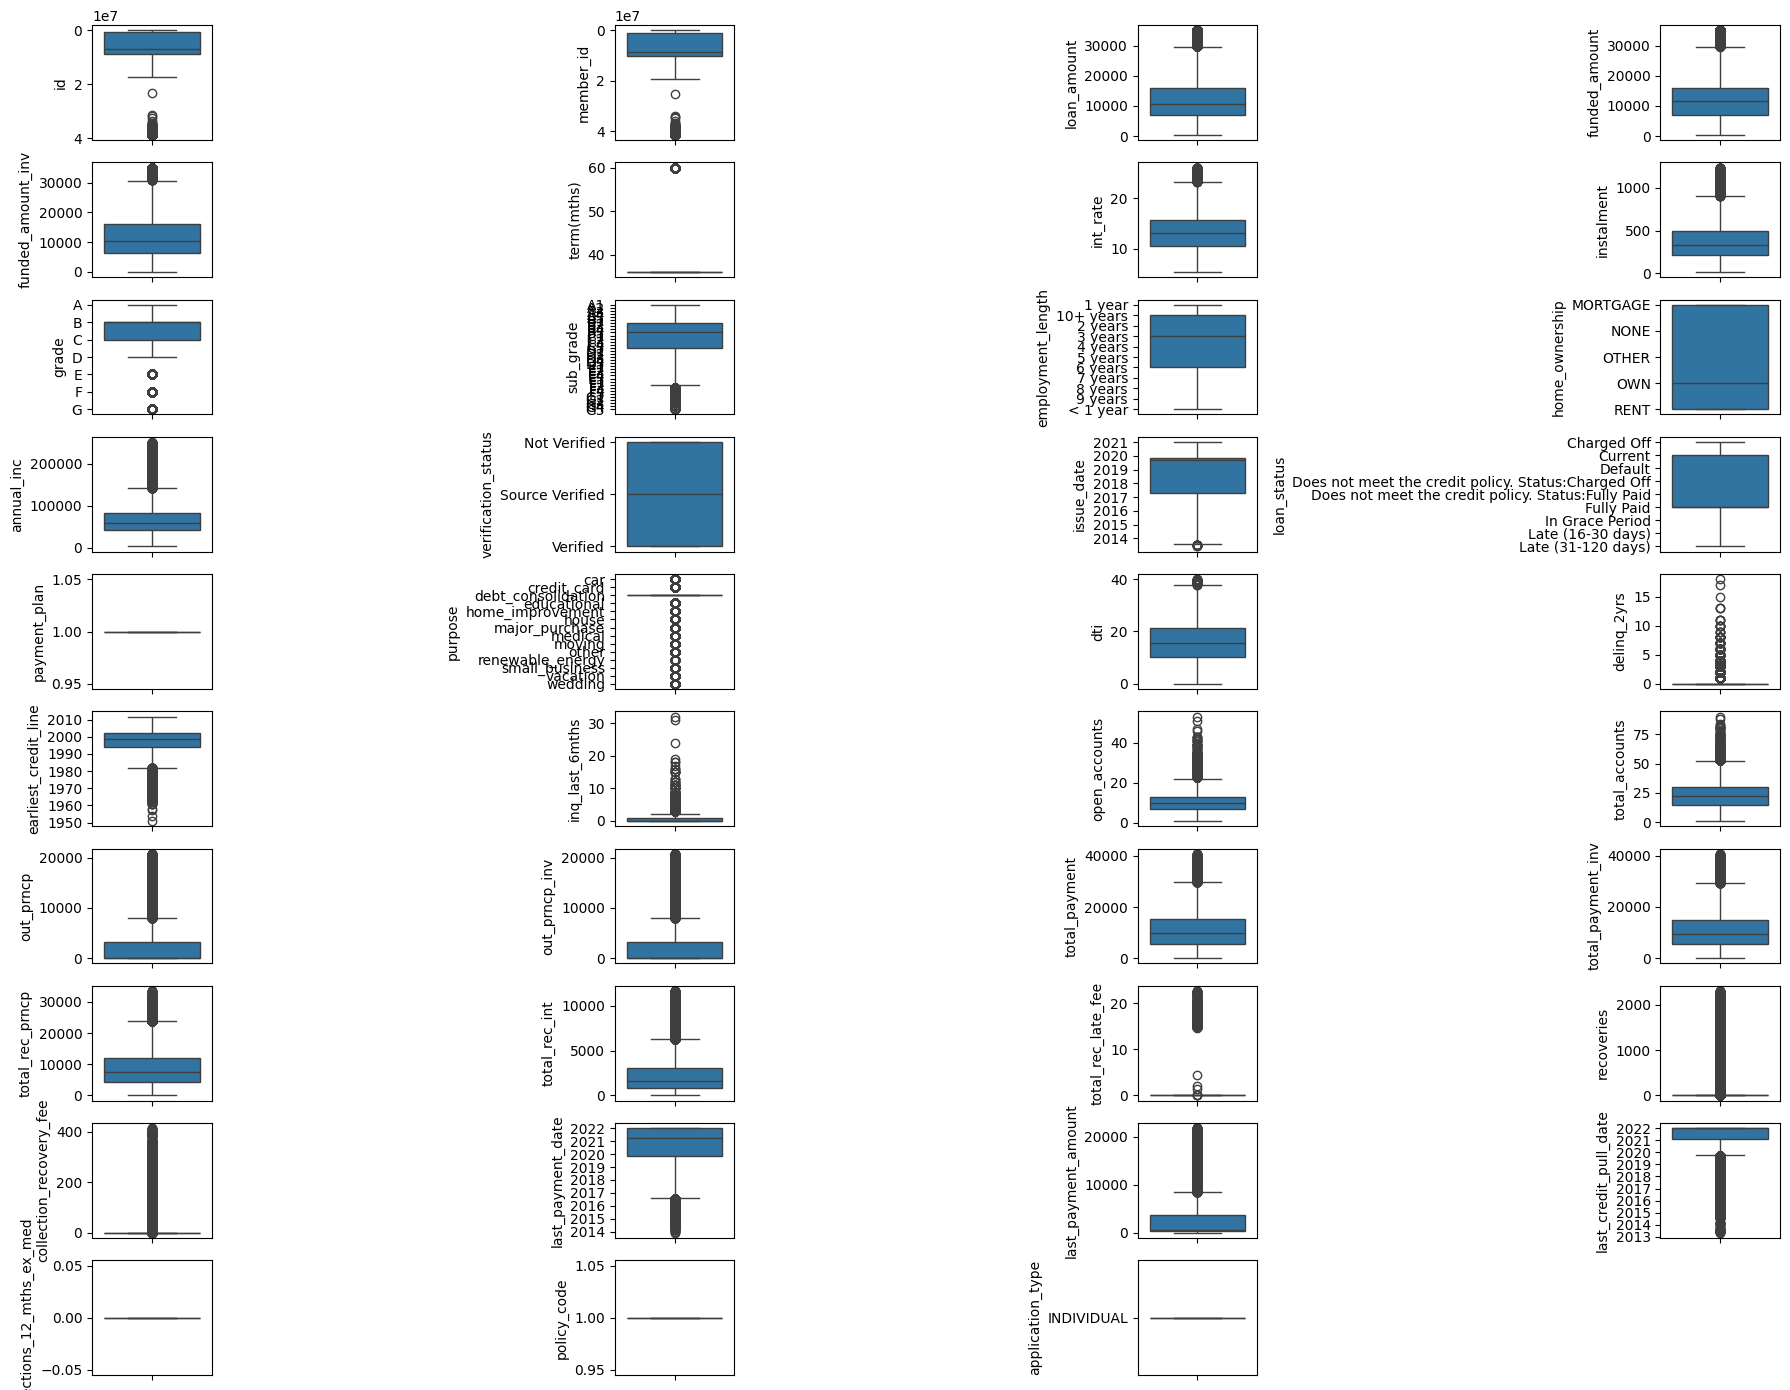

In [24]:
no_outliers_visuals_zscore = plotter.Plotter(df1)

no_outliers_visuals_zscore.visualise_outliers()

df1.to_csv('dfnooutlierszscore.csv')

## Checking for overly correlated columns

It may be the case that some of the columns in my dataset are not necessary because they are essentially the same thing as another column. I will generate the heatmap to check this and take appropriate action. This will be done by using Seaborns heatmap on the correlation matrix produced by Pandas

<Axes: >

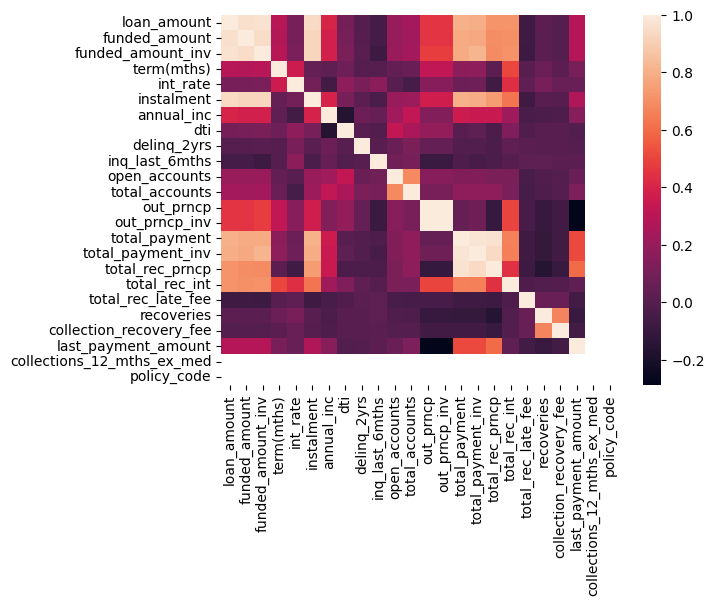

In [25]:
check_corr = df1.select_dtypes(['float64','int64']).corr()
sns.heatmap(check_corr)

It appears there are two groups of heavily correlated columns

1) funded_amount, funded_amount_inv
2) total_payment, total_payment_inv

It is only necessary for one column from each of these groups. I have created a method that drops columns if they have a correlation of over 0.9

In [26]:
df_drop_overcorr = Data_FrameTransform(df1)

new_df = outlier_trans.remove_overcorrelation(0.9)

print(new_df.columns)

['funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp']
Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'term(mths)',
       'int_rate', 'grade', 'sub_grade', 'employment_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_date', 'loan_status',
       'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'total_payment', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code',
       'application_type'],
      dtype='object')


In [27]:
new_df.to_csv('dfdropcorrelation.csv')
df1.to_csv('outliers_removed_zscore.csv')

In [28]:

rows_to_consider = df1.loc[df1['loan_status'] == "Current"]
print(rows_to_consider)

             id member_id  loan_amount  funded_amount  funded_amount_inv  \
0       8588502  10330306         5000         5000.0        5000.000000   
4       8148555   4640566        12000        12000.0       12000.000000   
6       8977266  10779272        10000        10000.0       10000.000000   
11      8629345  10401156         4375         4375.0        4375.000000   
12     38361412  41145143         4000         4000.0        4000.000000   
...         ...       ...          ...            ...                ...   
48009    638468    817853         8000         8000.0        8000.000000   
51786    474796    600705         8000         8000.0        8000.000000   
52685    837367    523086        16000        16000.0       15835.081939   
53834    356706    362135         2400         2400.0        2400.000000   
54036  37842007    315527        25000        25000.0       25000.000000   

       term(mths)  int_rate  instalment grade sub_grade  ... total_rec_int  \
0        